# Predictive Housing Model Using Various Linear Regression Algorithms

### Introduction

This report presents the findings and outcomes of our project aimed at developing a predictive model for housing prices. We chose this topic due to its relevance and practical significance, particularly for future homeowners, including many individuals in our CS345 class. We feel that this is a relevant topic because most current college students (and specifically students in CS345) are future homeowners and it’s important for these future homeowners to be able to predict and prepare for the prices of housing in the future. The project utilized a dataset from Kaggle updated in 2022, encompassing various features such as the area of the house, number of bedrooms and bathrooms, presence of amenities like a basement or hot water heating, among others. The primary objective was to build a machine learning model capable of accurately predicting housing prices based on these features.

### Dataset Description

The dataset contains the following features:

- Housing Prices
- Area of the House
- Number of bedrooms
- Number of bathrooms
- Stories
- Guest room (True or False)
- Basement (True or False)
- Hot water Heating (True or False)
- Air conditioning (True or False)
- Number of parking spaces

The dataset was preprocessed to handle missing values and encode categorical variables into a numeric format using label encoding.


### Model Training

The dataset was split into training and testing sets. We employed four different models for training:

1. Linear Regression
2. Ridge Regression
3. Random Forest Regression
4. K-Nearest Neighbors Regression

Each model was trained using the training set, and hyperparameters were optimized using GridSearchCV to improve performance if applicable.


### Model Evaluation

The trained models were evaluated using the testing set. Performance metrics including Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) were calculated for each model to assess predictive accuracy.


### Results and Discussion

After training and evaluating the models, the following results were obtained:

- Linear Regression:
  - MAE: [1771751116594.04]
  - MSE: [1771751116594.04]
  - RMSE: [1331071.4167895124]

- Ridge Regression:
  - MAE: [978267.4372351413]
  - MSE: [1777446008018.0703]
  - RMSE: [1333208.9138683667]

- Random Forest Regression:
  - MAE: [1037187.3484811416]
  - MSE: [1996829343239.5232]
  - RMSE: [1413092.1212856306]

- K-Nearest Neighbors Regression:
  - MAE: [978267.4372351413
  - MSE: [1777446008018.0703]
  - RMSE: [1333208.9138683667]

Based on the evaluation metrics, the TEMP performed the best in terms of TEMP, indicating its suitability for predicting housing prices. Through this project, we learned the importance of data preprocessing, model selection, and hyperparameter tuning in developing accurate predictive models. Additionally, we gained insights into the strengths and weaknesses of different machine learning algorithms when applied to real-world datasets.


### Team Member Contributions

#### Colin Trujllo:

Colin contributed to data exploration and preprocessing. He was responsible for exploring the dataset’s features and visualizing the data to gain insights. Additionally, Colin led the data preprocessing phase, handling missing data, and converting categorical variables into a numerical format using label encoding. He ensured the dataset was well-prepared for model training. Colin also took charge of training the Linear Regression model and the K-Nearest Neighbors Regression model and evaluating their performance.

#### Pavan Omprakash:

Pavan contributed to model training and evaluation. He was responsible for loading the dataset, and splitting the dataset into training and testing sets, as well as training the machine learning models Ridge Regression and Random Forest Regression. Pavan optimized the models' hyperparameters using GridSearchCV and conducted evaluations to assess thee predictive performance. Additionally, Pavan worked on interpreting the results of the models' predictions and describing them.


In [42]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import os

current_dir = os.getcwd()
dataset_name = "Housing.csv"
dataset_path = os.path.join(current_dir, dataset_name)

df = pd.read_csv(dataset_path)
categorical_features = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]

label_encoder = LabelEncoder()

for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])


X = df.drop(columns=["price"]) 
y = df["price"]

In [43]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression() 
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred)
rmse_lin = mean_squared_error(y_test, y_pred, squared=False)
mae_lin = mean_absolute_error(y_test, y_pred)

print("Linear Regression Mean Absolute Error:", mse_lin)
print("Linear Regression Mean Squared Error:", mse_lin)
print("Linear Regression Root Mean Squared Error:", rmse_lin) 

Linear Regression Mean Absolute Error: 1771751116594.04
Linear Regression Mean Squared Error: 1771751116594.04
Linear Regression Root Mean Squared Error: 1331071.4167895124


C:\Users\CFTOr\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

ridge_reg = Ridge() 

grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

ridge_reg = Ridge(alpha=grid_search.best_params_["alpha"]) 
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred)
rmse_ridge = mean_squared_error(y_test, y_pred, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred)

print("Ridge Regression Mean Absolute Error:", mae_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)
print("Ridge Regression Root Mean Squared Error:", rmse_ridge) 

Ridge Regression Mean Absolute Error: 978267.4372351413
Ridge Regression Mean Squared Error: 1777446008018.0703
Ridge Regression Root Mean Squared Error: 1333208.9138683667


C:\Users\CFTOr\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [45]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    "n_estimators": [25, 50, 100],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv = 5, scoring="neg_mean_squared_error", verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_rf_reg = RandomForestRegressor(**best_params, random_state=2)
best_rf_reg.fit(X_train, y_train)

y_pred = best_rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred)

print("Random Forest Mean Absolute Error:", mae_rf)
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest Root Mean Squared Error:", rmse_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Random Forest Mean Absolute Error: 1037187.3484811416
Random Forest Mean Squared Error: 1996829343239.5232
Random Forest Root Mean Squared Error: 1413092.1212856306


C:\Users\CFTOr\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [46]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)


param_grid = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
}

knn_reg = KNeighborsRegressor()

grid_search = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

knn_reg = KNeighborsRegressor(n_neighbors=grid_search.best_params_["n_neighbors"]) 
knn_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred)
rmse_knn = mean_squared_error(y_test, y_pred, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred)

print("K-NN Mean Absolute Error:", mae_knn)
print("K-NN Mean Squared Error:", mse_knn)
print("K-NN Forest Root Mean Squared Error:", rmse_knn)

K-NN Mean Absolute Error: 978267.4372351413
K-NN Mean Squared Error: 1777446008018.0703
K-NN Forest Root Mean Squared Error: 1333208.9138683667


C:\Users\CFTOr\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


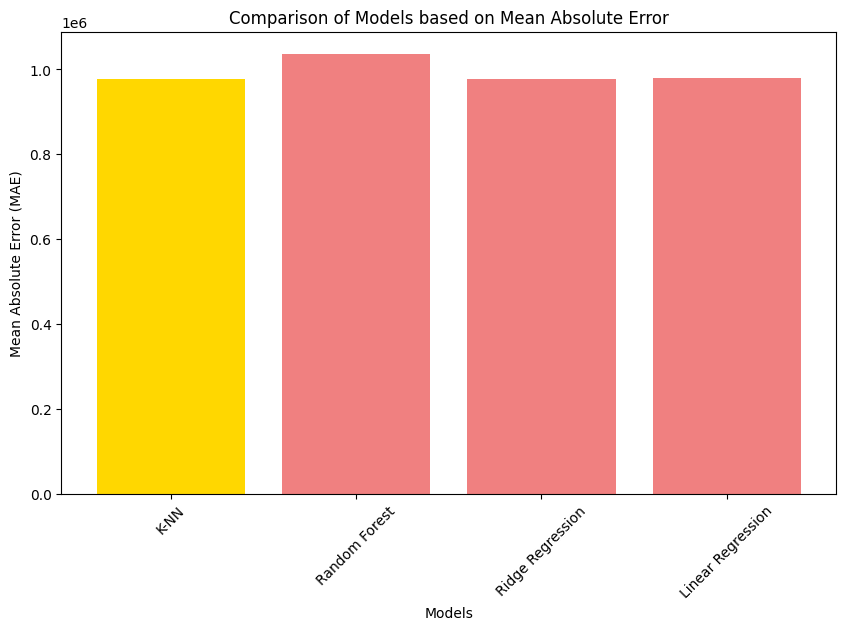

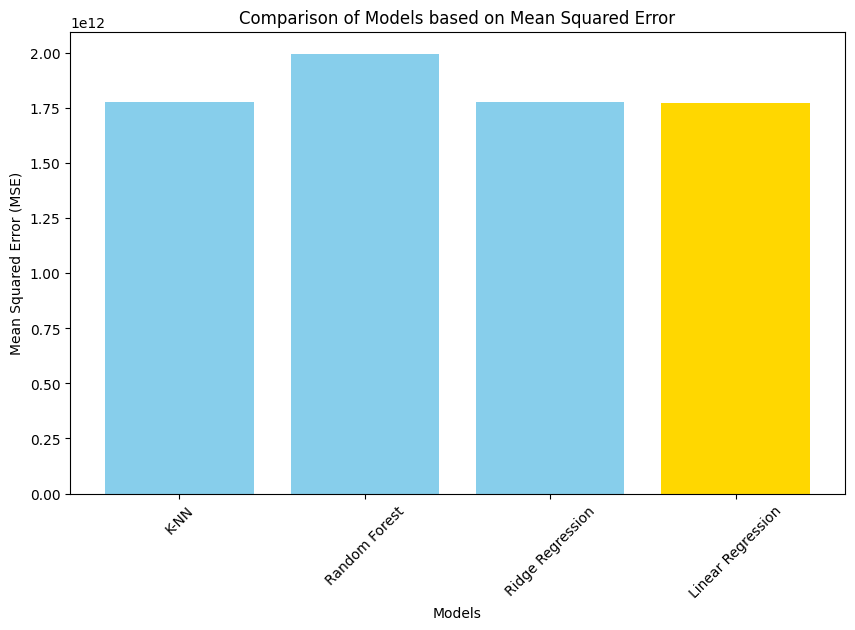

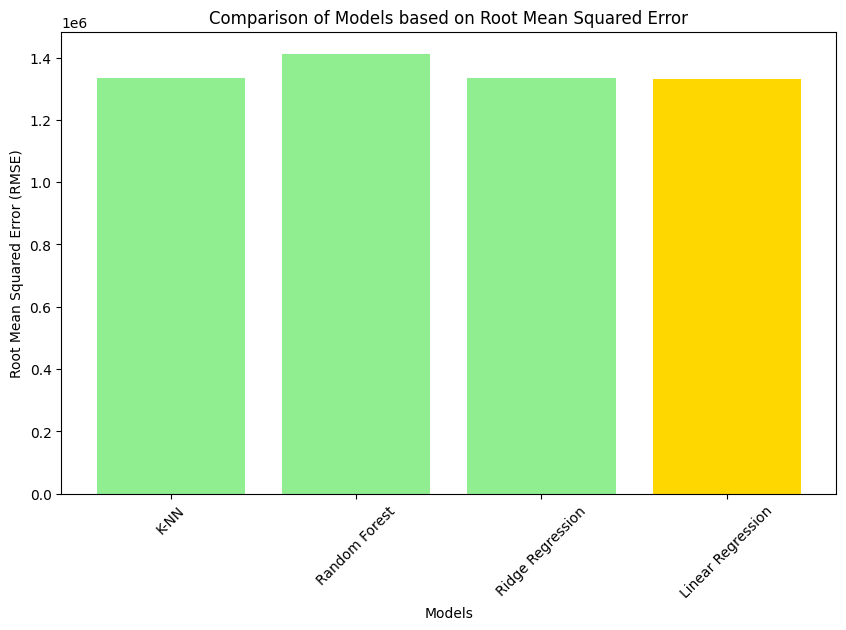

In [47]:
models = ["K-NN", "Random Forest", "Ridge Regression", "Linear Regression"]
mae_values = [mae_knn, mae_rf, mae_ridge, mae_lin]
mse_values = [mse_knn, mse_rf, mse_ridge, mse_lin]  
rmse_values = [rmse_knn, rmse_rf, rmse_ridge, rmse_lin]

best_model_index_mae = mae_values.index(min(mae_values))
best_model_index_mse = mse_values.index(min(mse_values))
best_model_index_rmse = rmse_values.index(min(rmse_values))

highlight_color = "gold"
colors_mae = ["lightcoral" if i != best_model_index_mae else highlight_color for i in range(len(models))]
colors_mse = ["skyblue" if i != best_model_index_mse else highlight_color for i in range(len(models))]
colors_rmse = ["lightgreen" if i != best_model_index_rmse else highlight_color for i in range(len(models))]

# Plot the bar graph for MAE
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color=colors_mae)
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of Models based on Mean Absolute Error")
plt.xticks(rotation=45)
plt.show()

# Plot the bar graph for MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=colors_mse)
plt.xlabel("Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Models based on Mean Squared Error")
plt.xticks(rotation=45)
plt.show()

# Plot the bar graph for RMSE
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=colors_rmse)
plt.xlabel("Models")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Comparison of Models based on Root Mean Squared Error")
plt.xticks(rotation=45)
plt.show()
